In [7]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

In [9]:
X

array([[13.913  , 10.531  ,  0.47694],
       [ 6.5065 ,  6.074  ,  0.79805],
       [ 5.0326 ,  5.8039 ,  0.67573],
       ...,
       [ 3.9684 ,  3.9145 ,  1.4448 ],
       [ 4.8865 ,  4.6478 ,  1.9963 ],
       [-1.672  ,  2.023  ,  1.8377 ]])

In [10]:
X.shape

(1000, 3)

In [13]:
np.linalg.matrix_rank(X)

3

<IPython.core.display.Javascript object>


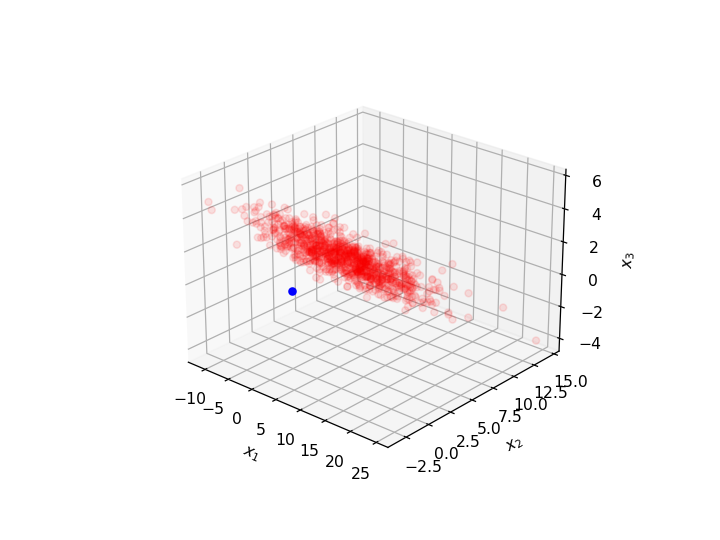

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [11]:
# Subtract mean
X_m = X - np.mean(X, 0)

In [16]:
np.linalg.matrix_rank(X_m)

3

In [19]:
(X_m == 0).sum()

0

<IPython.core.display.Javascript object>


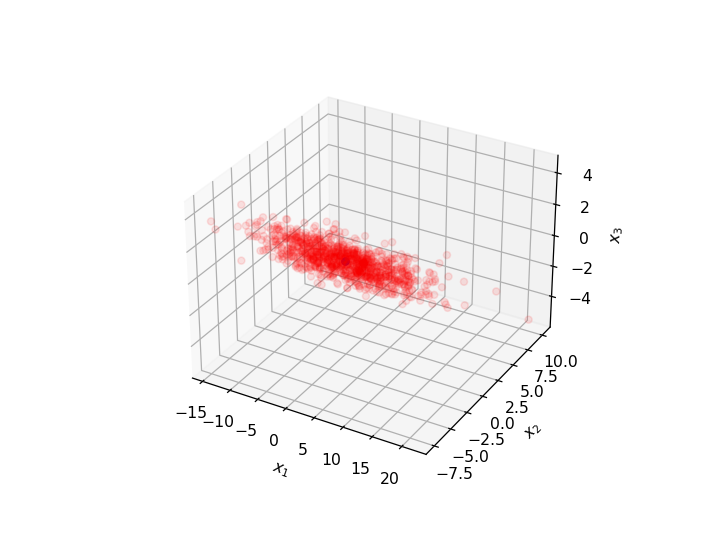

In [12]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [34]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = U[:,:1]

<IPython.core.display.Javascript object>


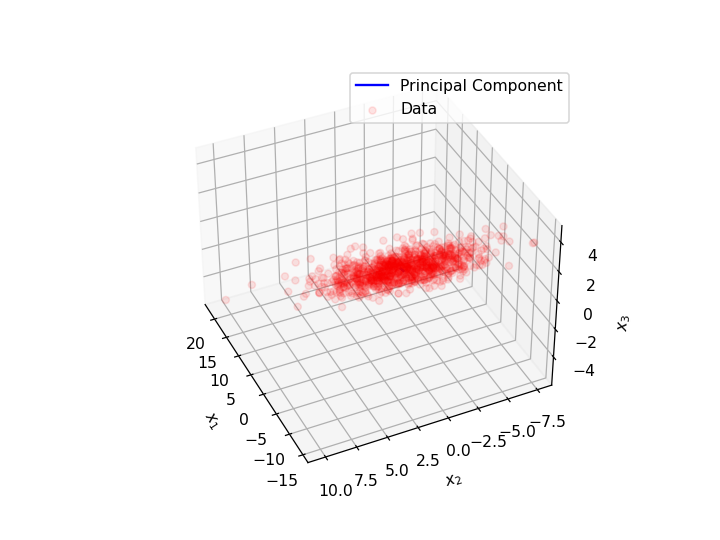

In [36]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

In [46]:
a.shape

(1000, 1)

In [38]:
X_m

array([[10.73714437,  6.28780489, -0.77916797],
       [ 3.33064437,  1.83080489, -0.45805797],
       [ 1.85674437,  1.56070489, -0.58037797],
       ...,
       [ 0.79254437, -0.32869511,  0.18869203],
       [ 1.71064437,  0.40460489,  0.74019203],
       [-4.84785563, -2.22019511,  0.58159203]])

In [37]:
X_m - a

array([[10.81255018,  6.3632107 , -0.70376216],
       [ 3.35401147,  1.85417199, -0.43469087],
       [ 1.871653  ,  1.57561352, -0.56546934],
       ...,
       [ 0.79566244, -0.32557704,  0.1918101 ],
       [ 1.71988824,  0.41384876,  0.7494359 ],
       [-4.88056665, -2.25290613,  0.54888101]])

In [40]:
X_m[:1,:]

array([[10.73714437,  6.28780489, -0.77916797]])

In [43]:
np.linalg.inv(a) @ X_m 

LinAlgError: Last 2 dimensions of the array must be square

In [49]:
np.linalg.solve(a, X_m)

LinAlgError: Last 2 dimensions of the array must be square